# clustering tourists reviews rating ()

In [240]:
import pandas as pd 
import numpy as np
#importing main visualization libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#importing modules from sklearn for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

In [241]:
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (20, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [260]:
df = pd.read_csv('data_after_preprocessing.csv')

In [261]:
df.head()

,Unnamed: 0,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0,0.0,0.00000,0.796917,0.732861,1.0,0.581871,1.0,0.506944,0.319865,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.00000,0.796917,0.732861,1.0,0.581871,1.0,0.559259,0.319865,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.00000,0.796917,0.731284,1.0,0.581871,1.0,0.559259,0.319865,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.06105,0.796917,0.731284,1.0,0.581871,1.0,0.506944,0.319865,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.00000,0.796917,0.731284,1.0,0.581871,1.0,0.559259,0.319865,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0


In [262]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)

In [263]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.0,0.00000,0.796917,0.732861,1.0,0.581871,1.0,0.506944,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.796917,0.732861,1.0,0.581871,1.0,0.559259,0.319865,0.481481,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.796917,0.731284,1.0,0.581871,1.0,0.559259,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0
3,0.0,0.06105,0.796917,0.731284,1.0,0.581871,1.0,0.506944,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.796917,0.731284,1.0,0.581871,1.0,0.559259,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.221133,0.0,0.0,0.0,0.0,0.0


###### Before we visualizing our data we cant get a clear plot of data according to a large number of features in our data ,PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame.

### We initialize our PCA models:

In [264]:
pca = PCA(n_components= 3)

In [265]:
pca_1 = pca.fit_transform(df)

In [266]:
pca.components_

array([[ 0.25746541,  0.16250744,  0.15598212,  0.11126182,  0.05202369,
        -0.07868549, -0.27518803, -0.23387177, -0.2932932 , -0.28126474,
        -0.22339444, -0.18046475, -0.15246734, -0.15679427, -0.08028939,
         0.14071023,  0.19731202,  0.22187628,  0.2132272 ,  0.21468675,
         0.20741807,  0.2434924 ,  0.24414347,  0.26068546],
       [-0.09222045, -0.08727851, -0.15084315, -0.31769981, -0.35516769,
        -0.31812505, -0.12482066, -0.13361557, -0.06750028, -0.04635045,
         0.09706542,  0.23001512,  0.22944972,  0.27031938,  0.19543207,
         0.06275959,  0.24152945,  0.3177979 ,  0.32804094,  0.20522759,
         0.02558035, -0.1432497 , -0.14211317, -0.10996534],
       [-0.21139602,  0.11278347,  0.24881583,  0.20405252,  0.23600937,
         0.27854127,  0.23387309, -0.19410861, -0.11343275, -0.32861743,
        -0.32862735,  0.05042687,  0.11870818,  0.21243227,  0.04706748,
        -0.26074506, -0.08810611,  0.07437571,  0.16009411,  0.18312672,
  

In [267]:
df1 = pd.DataFrame({'PCA_1': pca_1[:, 0],'PCA_2': pca_1[:, 1],'PCA_3': pca_1[:, 2]})


In [268]:
df1.head()

,PCA_1,PCA_2,PCA_3
0,-1.036179,-0.471839,0.816555
1,-1.049902,-0.479074,0.804641
2,-1.048589,-0.478328,0.806059
3,-1.032160,-0.474180,0.814718
4,-1.048589,-0.478328,0.806059


In [269]:
df1.shape

(5454, 3)

## PCA Visualizations

### displays our data point on the three principal components created for 3-D visualization 

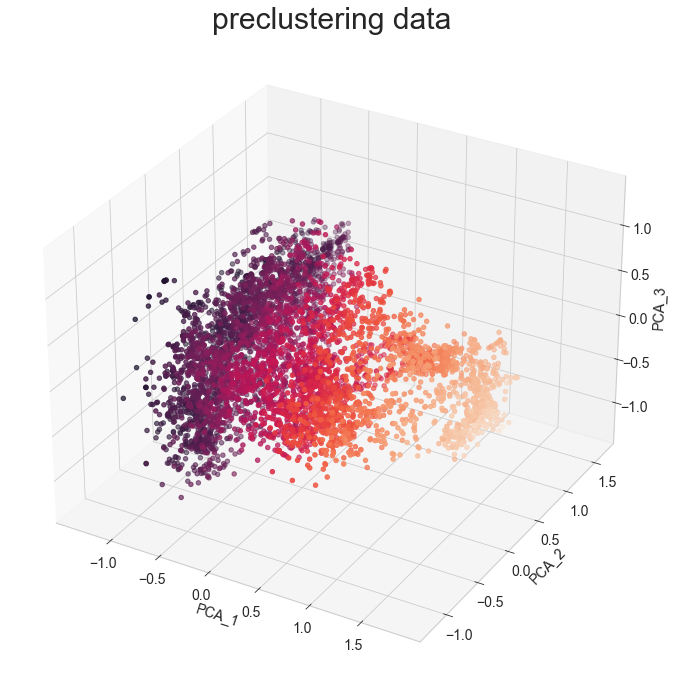

In [276]:
#Make Plotly figure
import re, seaborn as sns 
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(20,9))

ax = Axes3D(fig) # Method 1
#ax = fig.add_subplot(111, projection='3d') # Method 2

x = df1['PCA_1']
y = df1['PCA_2']
z = df1['PCA_3']

ax.scatter(x, y, z,c=x, marker='o')
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.set_title("preclustering data",fontsize=30)

plt.show()

###### the plot here is  not clear enugh, so i tend to reduced dimentional to 2 APC

# PCA Visualizations with 2D

In [308]:
pca = PCA(n_components= 2)

In [309]:
pca_1 = pca.fit_transform(df)

In [310]:
pca.components_

array([[ 0.25746573,  0.16250678,  0.15598264,  0.11126191,  0.05202347,
        -0.07868534, -0.27518833, -0.23387204, -0.29329257, -0.28126477,
        -0.22339492, -0.18046398, -0.15246733, -0.1567948 , -0.08028923,
         0.14071054,  0.1973118 ,  0.2218763 ,  0.21322712,  0.21468676,
         0.20741821,  0.24349106,  0.24414428,  0.26068569],
       [-0.09222262, -0.08727632, -0.15084513, -0.31770161, -0.35516842,
        -0.31812094, -0.1248222 , -0.13361606, -0.06750144, -0.04635195,
         0.09706814,  0.23001705,  0.22944916,  0.27031983,  0.19543078,
         0.06275895,  0.24153051,  0.31779708,  0.3280398 ,  0.20522767,
         0.02558252, -0.14324402, -0.14211525, -0.10996698]])

In [306]:
new_df = pd.DataFrame({'PCA_1': pca_1[:, 0], 'PCA_2': pca_1[:, 1]})

In [311]:
new_df.head()

,PCA_1,PCA_2
0,-1.036179,-0.471915
1,-1.049902,-0.479151
2,-1.048590,-0.478405
3,-1.032162,-0.474251
4,-1.048590,-0.478405


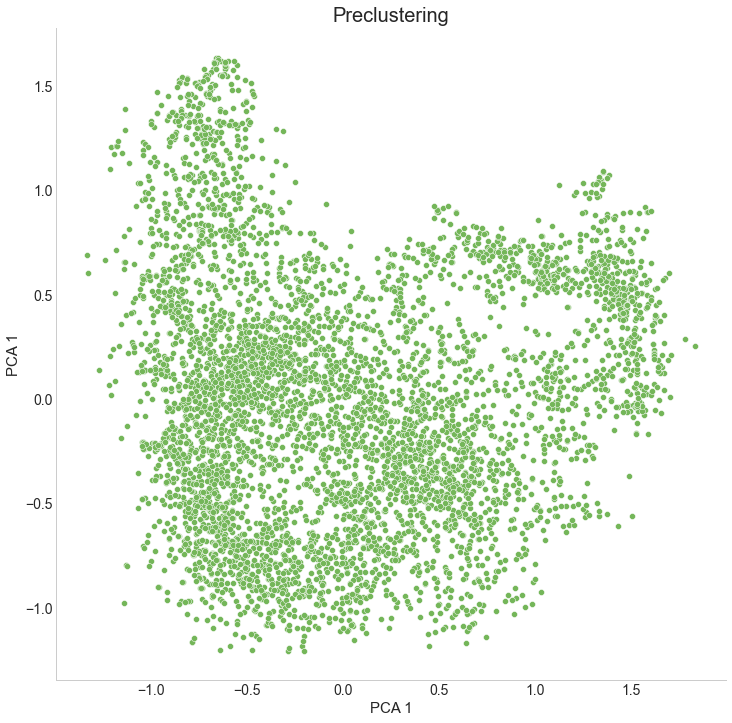

In [314]:
cluster_test = plt.subplots(figsize=(12, 12))

cluster_test = sns.scatterplot(x = 'PCA_1', y = 'PCA_2', data = new_df, color = '#74b659')


sns.despine()
cluster_test.set_xlabel('PCA 1', fontsize = 15)
cluster_test.set_ylabel('PCA 1', fontsize = 15)
cluster_test.set_title('Preclustering', fontsize = 20)
plt.show()

###### as we can see plotting our data before clustering we reduced dimentions of our feature by using PCA method 

# Applying K-mean clustering

In [290]:
kmeans = KMeans(n_clusters = 6)

In [291]:
kmeans.fit_transform(df1)

array([[3.39930534, 0.98155627, 1.9289154 , 2.45519659, 2.73569558,
        0.74419473],
       [3.40090789, 0.99220039, 1.93479965, 2.45147769, 2.74471439,
        0.74708279],
       [3.40079247, 0.99122797, 1.93433567, 2.45197597, 2.74392761,
        0.74694535],
       ...,
       [4.55089767, 1.76153143, 0.80735533, 3.59967934, 2.23305743,
        1.87391566],
       [4.4831687 , 1.67282468, 0.805238  , 3.5741454 , 2.18780981,
        1.85384322],
       [4.56810258, 1.76853196, 0.83354306, 3.61691161, 2.26986077,
        1.86498776]])

In [292]:
df1['cluster'] = kmeans.labels_

In [293]:
df1['cluster'].head()

0    5
1    5
2    5
3    5
4    5
Name: cluster, dtype: int32

In [320]:
kmeans = KMeans(n_clusters = 6)

In [321]:
kmeans.fit_transform(new_df)

array([[1.52969545, 1.77350712, 2.51328804, 3.09459206, 0.52357065,
        1.22245274],
       [1.54127764, 1.78509542, 2.51923259, 3.10639464, 0.53433213,
        1.23023362],
       [1.54014141, 1.78398233, 2.51862833, 3.10524844, 0.53330896,
        1.22945653],
       ...,
       [2.40972968, 0.68333122, 2.48064137, 3.08796603, 1.95237718,
        2.70197573],
       [1.57290581, 3.07215968, 4.52411884, 0.57489733, 2.59136043,
        1.98190953],
       [2.41767467, 0.67172004, 2.50124004, 3.09920377, 1.94020162,
        2.7059297 ]])

In [322]:
new_df['cluster'] = kmeans.labels_

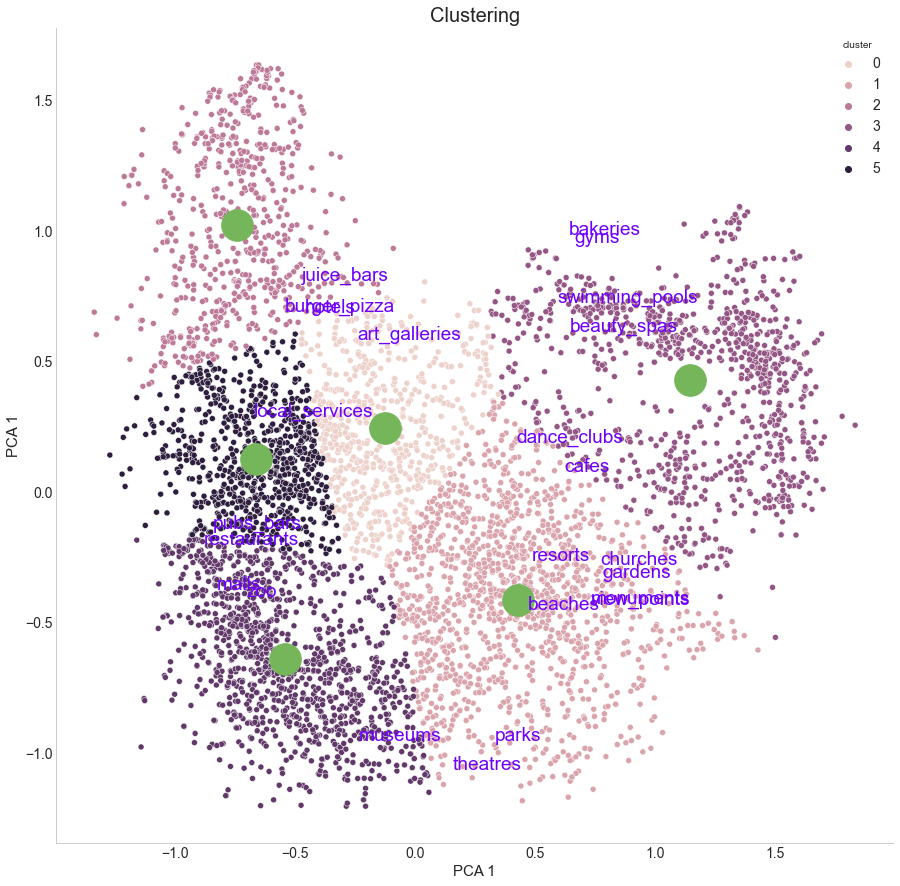

In [323]:
cluster = plt.subplots(figsize=(15, 15))
cluster = sns.scatterplot(x = 'PCA_1', y = 'PCA_2', data = new_df, hue = 'cluster')
cluster.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], c = '#74b659', s = 1000, marker = 'o')

coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
columns = list(df.columns)

for i in range(n):
    plt.text(coeff[i,0]*3, coeff[i,1]*3, columns[i], size = 19,color = '#6e00ff')
    
    
sns.despine()
cluster.set_xlabel('PCA 1', fontsize = 15)
cluster.set_ylabel('PCA 1', fontsize = 15)
cluster.set_title('Clustering', fontsize = 20)
plt.show()

###### from the plot we can deside that a chosen number of K is good